# Lab 1: Gradient descent
_Samuel Vaiter_ (<samuel.vaiter@cnrs.fr>)

In this practical, we are going to study the **gradient descent** algorithm, and several variations of it, through the lenses of three examples:
1. Two simple 2D functions to optimize, easy to visualize thanks to `matplotlib.pyplot.contour`
2. The ordinary least square problem
3. Digits classification with multinomial logistic regression

**Instructions**
1. You need to send me your completed jupyter notebook at <samuel.vaiter@cnrs.fr> **one week** (before start of class time + 168h) after the end of the session with subject 
    
    `[Opt Lab 1/2023] LASTNAME Firstname`
    
2. All the Python cells should be error-free.
3. When a theoretical question is asked in a cell, fill your answer in Markdown/LaTeX in it. You should give the mathematical steps necessary to reproduce your answer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Toy example in 2D

We are going to test first our methods on two functions, one convex (potentially strongly convex), the other not.

The convex function is going to be a simple quadratic form on $\mathbb{R}^2$ defined by
$$ f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2 , $$
for some $\mu \in \mathbb{R}$.



**Q1.** Does the function $f$ is convex? When is it strongly convex?

## <font color="green">Answer :</font>


The Hessian matrix of $f$ is given by:

$$
H f(x_0,x_1) = 
\begin{pmatrix}
\frac{\partial^2 f}{\partial x_0^2}(x) & \frac{\partial^2 f}{\partial x_0 \partial x_1}(x) \\
\frac{\partial^2 f}{\partial x_1 \partial x_0}(x) & \frac{\partial^2 f}{\partial x_1^2}(x) \\
\end{pmatrix}
= 
\begin{pmatrix}
2+\mu & -2 \\
 -2 & 2 \\
\end{pmatrix}
$$

In order to determine whether the function $f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2$  is convex, we need to examine  the Hessian matrix of this function $f$ . If it is positive semidefinite for all $x \in \mathbb{R}^2$, the function is convex. For that, we need to determine de derivatives of the Hessian matrix by solving :

$$det(H(𝑓) - λI) = 0$$

$$(2 + 𝜇 - λ) (2 - λ) - (-2) (-2) =0$$

$$=4 -\mu\lambda +2\mu -\mu\lambda -2\lambda +\lambda^2$$

$$=\lambda^2-6\lambda+2\mu-\mu*\lambda+4$$

$$=\lambda^2-\lambda(6+\mu)+2\mu+4$$

Now, let's find eigein value  with $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

$$x1 = \frac{(6+\mu) + \sqrt{(6+\mu)^2 - 4*2\mu+4}}{2}$$

$$x2 = \frac{(6+\mu) - \sqrt{(6+\mu)^2 - 4*2\mu+4}}{2}$$


The eigenvalues of this matrix are 2 and 𝜇, both are positive if 𝜇 > 0.

Therefore, the Hessian matrix is positive semidefinite, thus  the function 𝑓(𝑥) is convex ∀𝑥 ∈ ℝ² when 𝜇 >= 0. 

**Strongly convex** :
The lesser eigenvalue of the Hessian matrix is 𝜇, thus $f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2$ is strongly convex when 𝜇>0.



**Q2**. Determine its unique minimizer when $\mu > 0$.


## <font color="green">Answer :</font>


The gradient of the function $f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2$ is given by:

$$\nabla f(x) = \begin{bmatrix}\frac{\partial f(x)}{\partial x_0} \ \frac{\partial f(x)}{\partial x_1}\end{bmatrix}$$

$$\nabla f(x) = \begin{bmatrix}2(x_0-x_1-1)+\mu x_0 \ -2(x_0-x_1-1)\end{bmatrix}$$

Setting this gradient to 0, we obtain:

$$2(x_0-x_1-1)+\mu x_0 = 0$$
$$-2(x_0-x_1-1) = 0$$

Solving these equations, we have:

$$x_0 = -\frac{1}{\mu},\ x_1 = -\frac{1}{\mu} + 1$$

From this computations, the critical point is $\big(-\frac{1}{\mu}, -\frac{1}{\mu} + 1\big)$, it is the the unique minimizer of the function $f(x)$ when $\mu > 0$.


**Q3**. Implement it as a function `f2D_convex(x, mu=1.0)` taking as arguments the 2D vector `x` and the strong-convexity parameter `mu`.

## <font color="green">Answer :</font>


The function  `f2D_convex(x, mu=1.0)` takes in a 2D vector $x = \begin{pmatrix} x_0 \\ x_1 \end{pmatrix}$,a strong-convexity parameter $\mu$, and returns the value of the convex function defined by:

$$ f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2 $$

To obtain a result, the function compute the square difference between first and second components of $x$ while substracting 1. To this results, it adds the square of the first components of $x$ times $\frac{𝜇}{2}$


This function can be used to evaluate the value of the convex function for different input vectors $x$ and differents values of the strongconvexity parameter $\mu$.


In [2]:
def f2D_convex(x, mu=1.0):
# BEGIN STUDENT CODE
    return (x[0]-x[1]-1)**2+(mu/2)*x[0]**2
# END STUDENT CODE

**Q4**. Display the levelsets of the function `f2D_convex` around $(0,0)$. Modify the value of $\mu$ and see how the geometry change. _Hint_: You should look at the help of `np.meshgrid`, `plt.contourf` and eventually `np.vectorize`.

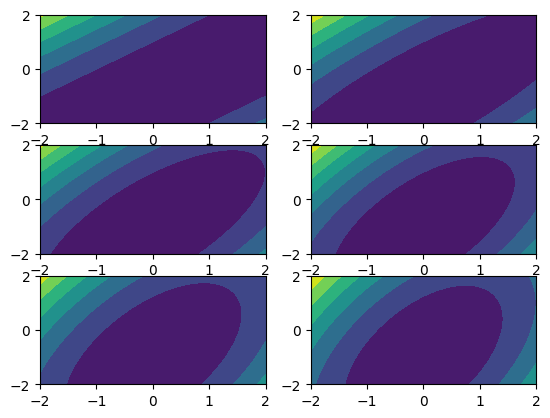

In [3]:
# Display the level sets of `f2D_convex`


x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)

fig,ax=plt.subplots(3,2)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=0))(X,Y)
ax[0,0].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=1))(X,Y)
ax[0,1].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=2))(X,Y)
ax[1,0].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=3))(X,Y)
ax[1,1].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=4))(X,Y)
ax[2,0].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=5))(X,Y)
plt.contourf(X,Y,Z)

## <font color="green">Answer :</font>


Here, we have different result of the `f2D_convex(x, mu=1.0)` plots with different mu. The darker the color, the lesser is the value, we can see that the more you go in the center, the lesser are the values and we can kind of see the local minima.


**Q5**. Observe what happens when $\mu = 0$. Can you explain it?

## <font color="green">Answer :</font>


I think that when $\mu = 0$ (1st plot), the function $f(x) = (x_0 - x_1 - 1)^2$ is no longer strongly convex. We can observe on the graph that there is no more *round* shapes. It confirms what we have seen before, in order for the function to be strongly convex, we need to have $\mu > 0$.


We now turn to another function, 
$$ f(x) = \cos(x_0) + \sin(x_1) . $$

**Q6**. Is it a convex function? Describe the minima of $f$.



https://www.symbolab.com/solver/function-concavity-calculator



## <font color="green">Answer :</font>


No, the function $f(x) = \cos(x_0) + \sin(x_1)$ is not convex. To see this, we can compute the Hessian of the function:

$$
H f(x_0,x_1) = \begin{pmatrix} -\cos(x_0) & 0 \\ 0 & -\sin(x_1) \end{pmatrix}
$$

We can clearly see that the Hessian Matrix is not positive semi-definite for all values of $x$ because of the eigeinvalues $-cos(x_0)$ and $sin(x_1)$, which means that the function $ f(x) = \cos(x_0) + \sin(x_1) . $ is not convex.


So we obtain an Hessian matrix at the critical points that is equal to :

$H f(x_0,x_1) = \begin{pmatrix}(-1)^n & 0 \\ 0 & (-1)^m\end{pmatrix}$

The eigenvalues of $H f(x_0,x_1)$ are $(-1)^n$ and $(-1)^m$. these value can become negative in the case of $n,m <0$, we then can have a critical point with a minima or a maxima $\rightarrow{}$ We obtain a saddle point.

**Q7**. Implement it as a function `f2D_nonconvex(x)` taking as arguments the 2D vector `x`. Display its levelsets.

In [4]:
def f2D_nonconvex(x):
# BEGIN STUDENT CODE
    return np.cos(x[0]) + np.sin(x[1])
# END STUDENT CODE

## <font color="green">Answer :</font>


This code use the function `f2D_nonconvex(x)` to visualize the non-convex function $ f(x) = \cos(x_0) + \sin(x_1) . $ over the range $(-2,2)$. Again, we have the darker colors for the lesser values and lighter colors for the higher values. At first, we dont know very well what we are observing, but the more we increase the range from $(-2,2)$ to $(-100,100)$ the more we can observe the non convex phenomena : We have many local maxima and minima. The 4 ploth shows it very well according to me. 

It is only a personnal opinion but I think it is a very beautifull and impressive phenomena to observe.

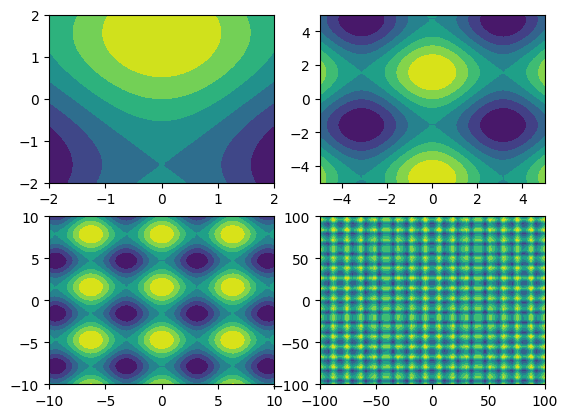

In [5]:

x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)

x2 = np.linspace(-5,5,50)
y2 = np.linspace(-5,5,50)
X2,Y2 = np.meshgrid(x2,y2)

x3 = np.linspace(-10,10,50)
y3 = np.linspace(-10,10,50)
X3,Y3 = np.meshgrid(x3,y3)

x4 = np.linspace(-100,100,50)
y4 = np.linspace(-100,100,50)
X4,Y4 = np.meshgrid(x4,y4)

fig,ax=plt.subplots(2,2)
Z = np.vectorize(lambda x,y: f2D_nonconvex(np.array([x,y])))(X,Y)
ax[0,0].contourf(X,Y,Z)
Z2 = np.vectorize(lambda x2,y2: f2D_nonconvex(np.array([x2,y2])))(X2,Y2)
ax[0,1].contourf(X2,Y2,Z2)
Z3 = np.vectorize(lambda x3,y3: f2D_nonconvex(np.array([x3,y3])))(X3,Y3)
ax[1,0].contourf(X3,Y3,Z3)
Z4 = np.vectorize(lambda x4,y4: f2D_nonconvex(np.array([x4,y4])))(X4,Y4)
ax[1,1].contourf(X4,Y4,Z4)

## Gradient descent procedure

We recall that a gradient step takes the form
$$ x^{(t+1)} = x^{(t)} - \eta^{(t)} \nabla f(x^{(t)}) $$
with some initialization $x^{(0)}$ and $\eta^{(t)}$ a learning rate policy.

**Q1**. Implement a function `gradient_descent_tmp` taking as argument `grad_f`, `eta`, `x0` and `max_iter`. `grad_f` will take as input an optimization variable `x`, `eta` is the learning policy taking as arguments `x` and `t` the current iteration, `x0` is the initialization and `max_iter` a maximal number of iterations. As an example, a constant learning rate policy can defined as
```python
def constant_eta(x, t):
    return 0.01
```

In [6]:
def gradient_descent_tmp(grad_f, eta, x0, max_iter):
    x = x0
# BEGIN STUDENT CODE
    for t in range(max_iter):
        x=x-eta(x,t)*grad_f(x)
# END STUDENT CODE
    return x

## <font color="green">Answer :</font>


This function `gradient_descent_tmp(grad_f, eta, x0, max_iter)` computes the update rule for gradient descent as follows:
$$
x = x - \eta(x,t) \nabla f(x)
$$
and do it at maximum max_iter times.




**Q2**. Implement a function `grad_f2D_convex` returning the gradient of the convex function defined in Section 1.

In [7]:
def grad_f2D_convex(x, mu=1.0):
# BEGIN STUDENT CODE
    return np.array([
        2 * (x[0] -x[1]-1) + mu * x[0],-2*(x[0]-x[1]-1)])
        
# END STUDENT CODE

## <font color="green">Answer :</font>


Here, we have : $$\nabla f_{2D\text{_}convex} = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right]$$

where $\frac{\partial f}{\partial x_0}$ is the partial derivative with respect to $x_0$ and is equal to $(2(x_0 - x_1 - 1) + \mu x_0)$,

$\frac{\partial f}{\partial x_1}$ is the partial derivative wit respect to $x_1$. and is equal to $(-2(x_0 - x_1 - 1))$

Thus it computes the gradient with :

$$\nabla f_{2D\text{_}convex} = \left[ 2(x_0-x_1-1)+\mu x_0, -2(x_0-x_1-1) \right]$$







**Q3**. Compute the Lipschitz constant of $\nabla f(x)$ and deduce a learning rate policy `lr_policy_f2D-convex(x,t)`. Discuss the difference between $\mu = 0$ and $\mu \neq 0$.

In [8]:
def hessian_f2D_convex(x, mu=1.0):
    return np.array([
        [2+mu, -2],
        [-2, 2]
    ])

def lr_policy_f2D_convex(x, t):
# BEGIN STUDENT CODE
    return 1. / np.linalg.norm(hessian_f2D_convex(x),2) #very costly
# END STUDENT CODE

## <font color="green">Answer :</font>


The  function `hessian_f2D_convex(x, mu=1.0)` is computing the hessian matrix depending on the 𝜇 : 
$$
H f(x_0,x_1) = \begin{pmatrix} 2+\mu & -2 \\ -2 & 2 \end{pmatrix}
$$


The function `lr_policy_f2D_convex(x, t)` compute the learning rate for the gradient descent, based on the previously defined `hessian_f2D_convex(x, mu=1.0)`, the learning rate consist in the inverse of the L2 norm of this Hessian matrix :
$$\frac{1}{| H(f)(x) |_2}$$
Lipschitz constant measure the maximum rate at which a gradient can change over a given unit of distance, and is a how it affects the convergence rate and stability of his optimization algorithm.




Below, we will perform some experiments on these functions








**Q4**. Test these functions, and observe the impact of `max_iter`

In [9]:
#gradient_descent_tmp(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), 10) #The choice of iterations is crucial, we should increase it to have better precision
max_iter_list = [1, 5, 10, 20, 50,100,1000]
result_list = []
for max_iter in max_iter_list:
    result = gradient_descent_tmp(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), max_iter)
    result_list.append(result)
df = pd.DataFrame(result_list, columns=['x0', 'x1'], index=max_iter_list)
df

,x0,x1
1,4.384472e-01,-0.438447
5,2.926606e-01,-0.625167
10,1.765725e-01,-0.773850
20,6.427478e-02,-0.917678
50,3.100225e-03,-0.996029
100,1.981440e-05,-0.999975
1000,2.220446e-16,-1.000000


## <font color="green">Answer :</font>


Here, we can see that the more we increase the `max_iters` parameters, we have a decrease of $x0$ towards 0 and a decrease of $x1$ towards -1. These points must be the minimum of the function.





**Q5**. Implement a function `gradient_descent` taking as arguments `grad_f`, `eta`, `x0`, `max_iter` (defined as in *2.Q1*), `return_all` a boolean indicating if we keep in memory all iterates and `callback` a callable that is called at each iteration if not `None`. If `return_all` and `callback` are `None`, it should behave like `gradient_descent_tmp`. Otherwise, it should return a `dict` containing the final iterate, and eventually all the iterates and outputs of the callback. The function may look like the following stub
```python
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    x = x0
    fxs = []
    xs = []
    # Do something
    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }
```

In [10]:
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    
# BEGIN STUDENT CODE
    x = x0
    fxs = None #nd array better than list in memory
    xs = None
    
    # Do something
    if callback:
        fx0=callback(x0)
        fxs = np.zeros((max_iter, *fx0.shape)) #* works like kwargs it adapts the shape according to input
        fxs[0]=fx0 #elipsis op because fx0 may be an array
    
    if return_all:
        xs=np.zeros((max_iter, *x0.shape))
        xs[0]=x0
        
    for t in range(max_iter):
        x=x-eta(x,t)*grad_f(x)
        if return_all:
            xs[t]=x
        if callback:
            fxs[t]=callback(x)
        
        
    #end of doing something
    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }
# END STUDENT CODE
gradient_descent(grad_f=grad_f2D_convex, eta=lr_policy_f2D_convex, x0=np.zeros(2), max_iter=1000, return_all=False, callback=None)

array([ 2.22044605e-16, -1.00000000e+00])

## <font color="green">Answer :</font>


This function `gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None)` is an optimisation tool taking as inputs a gradient function, learning rate function, an initial point $x0$ where the optimisation starts and a maximum_iteration parameter. 




**Q6**. Display the gradient descent on `f2D_convex` by plotting the function value both in linear scale, and loglog scale. Look at the documentation of `matplotlib.pyplot.loglog`.

Text(0, 0.5, '$\\log f(x^{(t)})$')

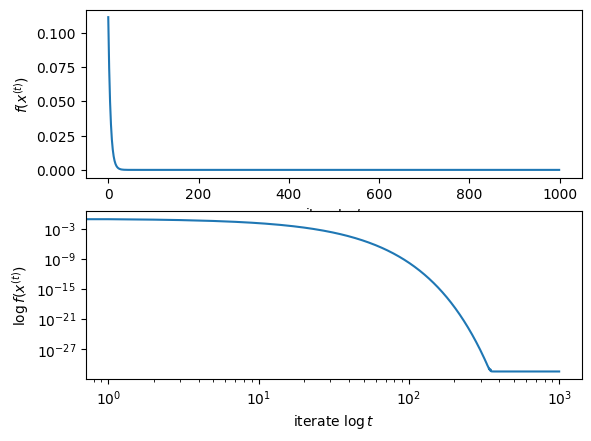

In [11]:
max_iter=1000
res = gradient_descent(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), max_iter, return_all=True, callback=f2D_convex)
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(max_iter),res['callbacks'])
ax[0].set_xlabel('iterate $t$')
ax[0].set_ylabel('$f(x^{(t)})$')
ax[1].loglog(np.arange(max_iter),res['callbacks'])
ax[1].set_xlabel('iterate $\log t$')
ax[1].set_ylabel('$\log f(x^{(t)})$')

## <font color="green">Answer :</font>


These plots provide a visual representation of the convergence of gradient descent on the `f2D_convex()` function, and confirm that the algorithm is able to find the optimal solution in a finite number of iterations.

We could think with the 1st plot that the value is decreasing exponentially, but we can see with the log plot that the functioins does not decreases with an exponential rate.
This is consistent with the theory of gradient descent, which states that the algorithm converges at a rate proportional to the inverse of the Lipschitz constant of the gradient of the objective function.

**Q7**. Visualize the gradient steps on a contour plot. Try several initializations. Try several step-sizes.

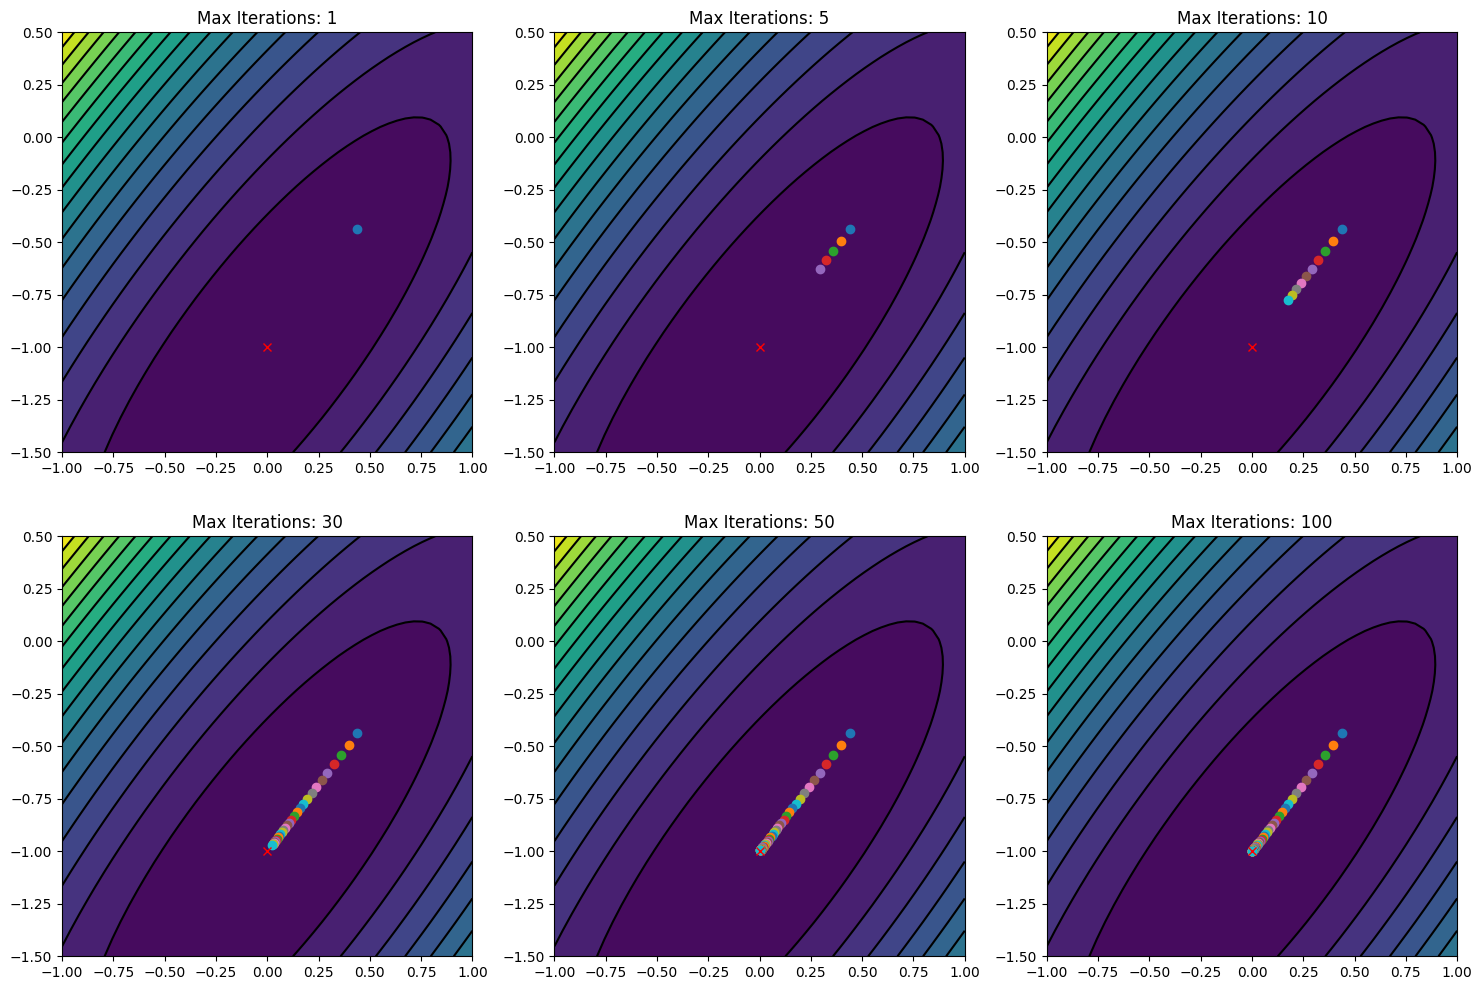

In [12]:
x = np.linspace(-1,1,50)
y = np.linspace(-1.5,0.5,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
max_iters = [1, 5, 10, 30, 50, 100]

for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        max_iter = max_iters[i*3 + j]
        ax.set_title(f'Max Iterations: {max_iter}')
        ax.contourf(X, Y, Z, 20)
        ax.contour(X, Y, Z, 20, colors='k')
        xs = res['iterates']
        for k in range(max_iter):
            x = xs[k]
            ax.plot(x[0], x[1], marker='o')

        sol = np.array([0,-1])
        ax.plot(sol[0], sol[1], marker='x', color ='red')
plt.show()


## <font color="green">Answer :</font>


This contour plot allows us to see the trajectories of the gradient descent. When we try different number of iterations, we clearly see that the algorithm converges to the optimal solution. Plus, we observe that it does converge very quickly.

It is a very usefull graph to observe the behavior of the gradient descend.

## Let's go to higher dimension.

For a matrix $A \in \mathbb{R}^{n \times p}$ and a vector $b \in \mathbb{R}^{n}$, the least-square objective reads
$$ f(x) = \frac{1}{2n} \| A x - b \|_2^2 . $$

**Q1**. Generate a matrix `A` of size 100 by 200 with i.i.d. normal entries and `b` also i.i.d. normal.

In [13]:
n, p = 100, 200
rng = np.random.default_rng()
# BEGIN STUDENT CODE
A=rng.standard_normal((n,p))
b=rng.standard_normal(n)
A.shape,b.shape
#b input needs the same ase A input
# END STUDENT CODE


((100, 200), (100,))

**Q2**. Implement `least_square` and its gradient `grad_least_square` with respect to `x`.

- `least_square`: the function takes a vector $x$ as input and returns the value of the least square objective function $f(x)$. The sum of squares $(Ax-b)^2$ is computed and averaged over $n$ observations.
- `least_square_alt`: this function computes the least square objective using the norm of the residual $\|Ax-b\|_2^2$ and then divides it by $2n$. This is equivalent to the first function, but with a slightly different notation.
- `least_square_alt2`: this function computes the least square objective by iterating over all $n$ observations and accumulating the sum of squared residuals. This is equivalent to the previous two functions, but with a different implementation.
- `grad_least_square`: this function computes the gradient of the least square objective with respect to $x$. 


In [14]:
def least_square(x):
    n,_=A.shape
    return 0.5 / n * np.sum((A@x-b)**2)

def least_square_alt(x):
    n,_=A.shape
    return 0.5/n * np.linalg.norm(A@x-b)**2 

def least_square_alt2(x):
    summ=0.0
    w=A@x-b
    for i in range(n):
        summ=w[i]**2
    return 0.5*summ/n


def grad_least_square(x):
# BEGIN STUDENT CODE
    #from R^2 to R
    n, _ = A.shape
    return 1/n * A.T @ (A @ x - b)

# END STUDENT CODE

## <font color="green">Answer :</font>


As these functions are explained in the question, I am not sure to have something to add.

However, after executing the three functions several times, we can observe that the `least_square_alt` function is consistently faster than the other two functions :

In [15]:
xx=rng.standard_normal(p)
%timeit least_square(xx)
%timeit least_square_alt(xx)
%timeit least_square_alt2(xx)

91.8 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
122 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
151 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Q3**. Compute the Lipschitz constant $L$ of $\nabla f$ and write a learning rate policy `lr_policy_least_square` _independant_ from the strong-convexity constant.

In [16]:
H=1/n*A.T@A
L=np.linalg.norm(H,2) #Lambda max
def lr_policy_least_square(x, t):
    return 1. / L


## <font color="green">Answer :</font>


To compute the Lipschitz constant of the gradient $\nabla f$, we use the formula $L = \| H \|_2$, where $H = \frac{1}{n} A^T A$ is the Hhessian Matrix of $f$.

Since $A$ has size $n \times p$, we have $H \in \mathbb{R}^{p \times p}$. 

The Lipschitz constant $L$ is equal to the maximum eigenvalue of $H$, which can be computed with the `np.linalg.norm` function.

Then, the function `lr_policy_least_square` returns the inverse of this constant, we will then have a learning rate policy _independant_ from the strong-convexity constant.

**Q4**. Run the gradient descent with the obtained policy, and plot in semilogy scale the evolution of the objective function. 

Text(0, 0.5, '$\\log f(x^{(t)})$')

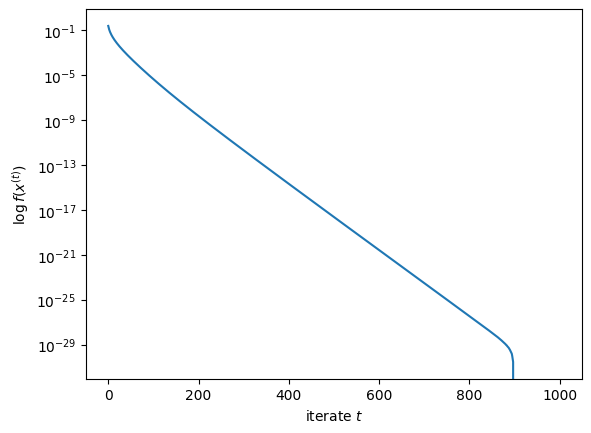

In [17]:
res = gradient_descent(grad_least_square, lr_policy_least_square, np.zeros(p), 1000, return_all=True, callback=least_square)
fig, ax = plt.subplots()
sol = np.linalg.lstsq(A, b, rcond=None)[0]
# BEGIN STUDENT CODE
lst_sol=least_square(sol)
ax.semilogy(res['callbacks']-lst_sol)
# END STUDENT CODE
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$\log f(x^{(t)})$')


## <font color="green">Answer :</font>


The variable `sol` is calculated as the true solution to the least squares problem using `np.linalg.lstsq`, and `lst_sol` represents the value of the least squares loss at this true solution. The plots shows the values of `list_sol` (y) at each iteration `t` (x).
The obtained curve is a very high quality curve with an error of $10^{-29}$, which I think is only due to the limitations of the machine accuracy. This is very nice since the goal is to minimize the objective function as close to zero as possible. 

**Q5**. Perform the same experiment with `A` of size 100 x 100. Does the numerics confirm the theory studied in the lecture? If not, how to explain this behavior? If yes, explain.

Text(0, 0.5, '$\\log f(x^{(t)})$')

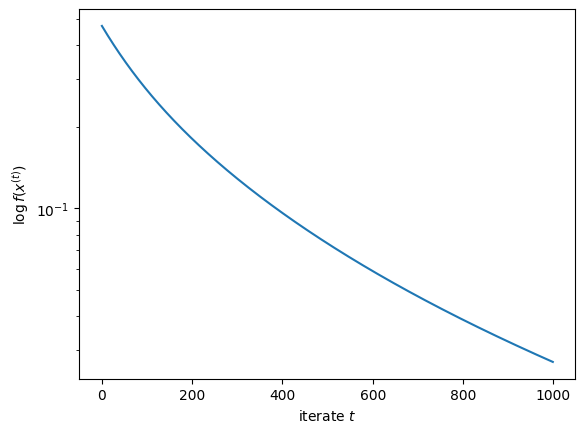

In [18]:
A=np.random.randn(n,p)/np.sqrt(n)

res = gradient_descent(grad_least_square, lr_policy_least_square, np.zeros(p), 1000, return_all=True, callback=least_square)
fig, ax = plt.subplots()
sol = np.linalg.lstsq(A, b, rcond=None)[0]
# BEGIN STUDENT CODE
lst_sol=least_square(sol)
ax.semilogy(res['callbacks']-lst_sol)
# END STUDENT CODE
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$\log f(x^{(t)})$')



## <font color="green">Answer :</font>


This part can be very tricky as we do not have the same scale on the graph. Here, we can see the same plot as previously but with a much slower decreasing curve than before.

This can confirm the theory studied in the lecture because we have seen that when a matrix is squared, its eigein values are very far from each other and it can have a strong impact on the objective function.

## Digits classification

We now turn our attention to a classification problem.
For the sake of simplicity, we will use the digits UCI ML dataset contained in `scikit-learn`

In [19]:
# Load digits dataset, note that the first time you run this, it will download the dataset (could take a while)
from sklearn.datasets import load_digits

This dataset is composed of 1797 samples, each of theme of size $8 \times 8 = 64$ in gray level (coded on [0,255]).
This is a low resolution dataset that will be easy to treat as a "batch".
We can access the data as vectors in `digits.data` and as images in `digits.images`.
The labels are contained in `digits.target`.

Dataset dimensions: (1797, 64)


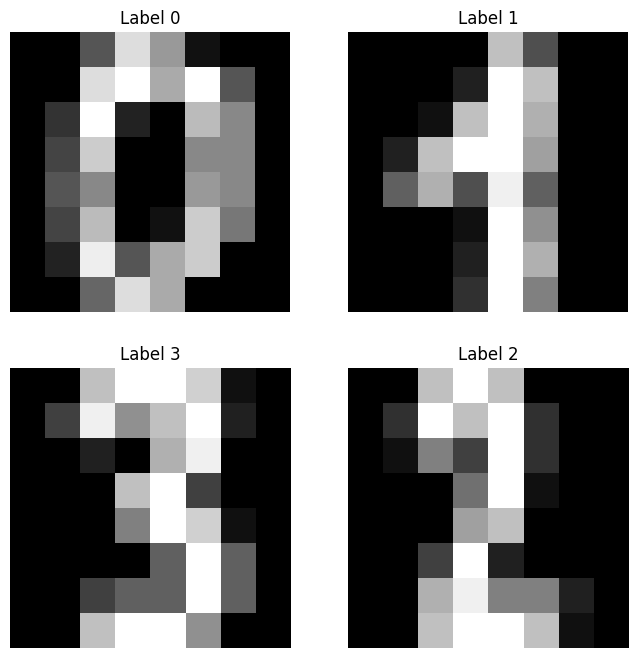

In [20]:
digits = load_digits()
(n_samples, n_features) = digits.data.shape
print(f"Dataset dimensions: {(n_samples, n_features)}")

# Display a few digits
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
idx = [0, 42, 345, 826]
for i, ax in enumerate(axs.ravel()):
    ax.imshow(digits.images[idx[i]], cmap='gray')
    ax.set_title(f"Label {digits.target[idx[i]]}")
    ax.axis('off')

**Q1**. Using `sklearn.model_selection.train_test_split`, split the dataset into a training and a test sets.
Center the training and the test set relative to the mean image of the training set.
Add a column of ones to take into account the potential bias term

In [21]:
# Split the dataset into train and test with a 80/20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Center the data
X_train = (X_train - X_train.mean(axis=0))
X_test = (X_test - X_train.mean(axis=0))

# Add a column of ones to the data to account for the bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

## <font color="green">Answer :</font>


`train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)` is splitting the dataset in `X_train, X_test, y_train, y_test` with train size of 80% of the data and test size 20%

Then we centerize the data and add a column of $1s$ to create a `bias`

To perform our classification task, we will turn to the multinomial logistic regression, or softmax classification.
The objective function here will be seek a weight matrix $W \in \mathbb{R}^{K \times p}$

$$ f(W) = -\sum_{i=1}^n \sum_{k=0}^{K-1} [y_i = k] \log(\hat p(y_i = k | X_i)) + \lambda \| W \|_{fro}^2, $$
where
$$ \hat p(y_i = k | X_i) = \frac{\exp(X_i W_k)}{\sum_{l=0}^{K-1}\exp(X_i W_l)} . $$

## <font color="green">Answer :</font>


Here, we have : $$W \in \mathbb{R}^{K \times p}$$

where $W$ is the optimization variable which belongs to $\mathbb{R}^{K \times p}$, where $K$ is the number classes and $p$ is the number of features.

Shortly, the `softmax classification` will assign some probabilities to the different classes in order to classify them. The following pictures represents well the softamx function :


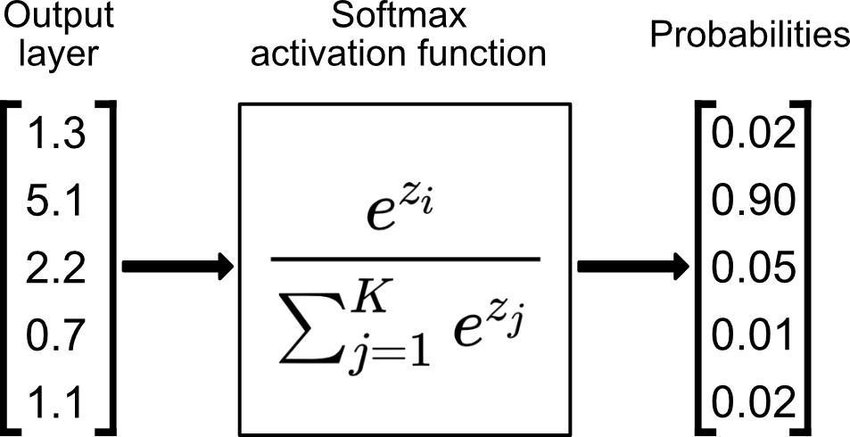

**Numerical stability of the softmax**. When computing the softmax of a vector, one has to be careful of the potential numerical errors due to the large values of $\exp$ when the argument is above 0.

In [22]:
scores = np.array([433, 23, 766])
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

C:\Users\paul\AppData\Local\Temp\ipykernel_23964\25557391.py:2: RuntimeWarning: overflow encountered in exp
  proba = np.exp(scores) / np.sum(np.exp(scores))
C:\Users\paul\AppData\Local\Temp\ipykernel_23964\25557391.py:2: RuntimeWarning: invalid value encountered in divide
  proba = np.exp(scores) / np.sum(np.exp(scores))


array([ 0.,  0., nan])

Clearly here, we would expect to obtain `[0., 0., 1.]`.
Remark that for any $c > 0$,
$$
\sigma(z)_i
=
\frac{\exp(z_i)}{\sum_{i=1}^p \exp{(z_j)}}
=
\frac{c\exp(z_i)}{c\sum_{i=1}^p \exp{(z_j)}}
=
\frac{\exp(z_i + \log c)}{\sum_{i=1}^p \exp{(z_j + \log c)}}
$$
A typical choice of $c$ is given by the solution of $\log c = - \max_j z_j$.

In [23]:
scores = np.array([433, 23, 766])
scores -= np.max(scores)
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

array([2.39848787e-145, 1.97626258e-323, 1.00000000e+000])

## <font color="green">Answer :</font>


In the previous cells, we use the `Softmax` function to convert the scores of the list `scores` into a list of probabilities.

**Q2**. Implement the `softmax_loss` function below. Take care to the potential numerical errors thanks to the trick above. _Hint_: remember that `numpy.arange(n)` build a ndarray containing all integer from 0 to `n` (included).

In [24]:
def softmax_loss(W, X, y, reg):
    n,_ = X.shape
    raw_scores = X@W
    
    proba=np.exp(raw_scores-raw_scores.max())
    proba /= np.sum(proba, axis=1,keepdims=True)
    
    loss=-np.sum(np.log(proba[np.arange(n),y]))/n
    loss += reg*np.sum(W**2)
    

    return loss

## <font color="green">Answer :</font>


Here, we compute the `softmax_loss` function as explain below `Question 1`.


To debug it, run the following cell. You should obtain a value close to $-\log(1/10)$.

**Q3**: Why should we obtain something close to this value?

In [25]:
# Generate a random softmax weight matrix
W = np.random.randn(64+1, 10) * 0.001
# Compute the softmax loss
loss = softmax_loss(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something more or less close to -log(0.1).
print(f"Loss: {loss}, expected: {-np.log(0.1)}")

Loss: 2.3062735636176663, expected: 2.3025850929940455


In [26]:
print("Number of classes :",len(np.unique(y_train)))

Number of classes : 10


## <font color="green">Answer :</font>


We should obtain a value close to $-\log(1/10)$ because there are 10 possible classes, each with equal probability of being the correct class. Therefore, the probability of predicting the correct class is 1/10, and the corresponding loss term is $-\log(1/10)$. Since we are averaging over all training samples, the expected loss is simply $-\log(1/10)$.

**Q4**. Compute the gradient of the loss $\nabla f(W)$ with respect to weight matrix.

**Q5**. Implement the gradient of the softmax loss as a `softmax_grad` function below. _Hint_: This function will be _very_ close to `softmax_loss`. Note that it would be more adequate to write a unique function returning _both_ the loss and the gradient.

In [27]:
def softmax_grad(W, X, y, reg):
    n,_=X.shape
    raw_scores=X@W
    
    #Numerical stable softmax
    proba=np.exp(raw_scores-raw_scores.max())
    proba/=np.sum(proba,axis=1,keepdims=True)
    
    #update prob vector
    proba[np.arange(n),y]-=1
    
    dW=X.T@proba/n
    dW+=2*reg*W
    return dW

## <font color="green">Answer :</font>


Yes, this function is pretty similar as `softmax_loss`. Thus I created a function `softmax_combined(W, X, y, reg):` to combine both functions as the question mentioned that it would be more adequat :

In [28]:
def softmax_combined(W, X, y, reg):
    #Similar part
    n,_ = X.shape
    raw_scores = X@W
    proba=np.exp(raw_scores-raw_scores.max())
    proba /= np.sum(proba, axis=1,keepdims=True)
    
    #softmax_loss part
    loss=-np.sum(np.log(proba[np.arange(n),y]))/n
    loss += reg*np.sum(W**2)
    
    #softmax_grad part
    proba[np.arange(n),y]-=1
    dW=X.T@proba/n
    dW+=2*reg*W

    return loss,dW

**Q6**. Run the gradient descent on the loss function defined by the training set. You should use a constant step size policy. _Hint_: define `softmax_grad_train` and `softmax_loss_train` taking only `W` as input.

Text(0, 0.5, '$f(x^{(t)})$')

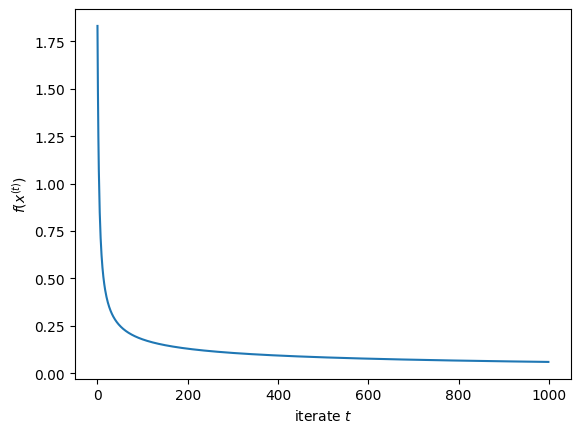

In [29]:


reg = 0.001

# BEGIN STUDENT CODE
def softmax_grad_train(W): #depends only on W
    return softmax_grad(W,X_train,y_train,reg)

def softmax_loss_train(W):
    return softmax_loss(W,X_train,y_train,reg)

res=gradient_descent(
softmax_grad_train, lambda x,t: 0.01, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.plot(res['callbacks'])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

## <font color="green">Answer :</font>


The plot shows the evolution of the softmax loss function over the iterations of the gradient descent algorithm. It starts with a high value and quickly decreases within the first few iterations, then gradually converges towards a lower value. This indicates that the algorithm is successfully minimizing the loss and learning the parameters of the softmax regression model.

Text(0, 0.5, '$f(x^{(t)})$')

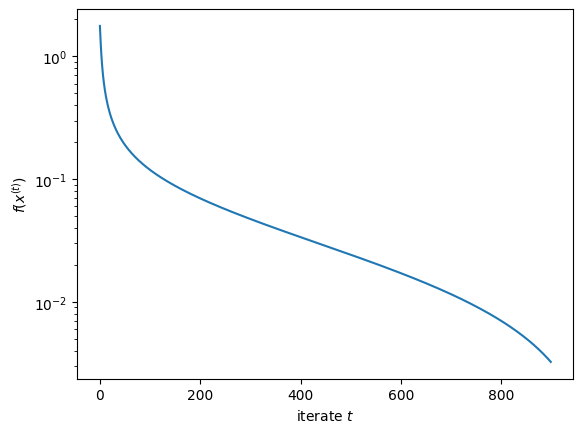

In [30]:
reg = 0.001
n_iter=1000
# BEGIN STUDENT CODE
def softmax_grad_train(W): #depends only on W
    return softmax_grad(W,X_train,y_train,reg)

def softmax_loss_train(W):
    return softmax_loss(W,X_train,y_train,reg)

res=gradient_descent(
softmax_grad_train, lambda x,t: 0.01, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.semilogy(res['callbacks'][:int(0.9*n_iter)]-res['callbacks'][-1])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

## <font color="green">Answer :</font>


We observe a significant decrease of the objective function during the first iterations. However, the convergence seems to be slower after around `100 iterations`, as the decrease in the objective function becomes less and less significant. We can also notice that the softmax loss function is still decreasing at the end of the `1000 iterations`, suggesting that the algorithm could be run for more iterations to further improve the accuracy. Overall, the plot indicates that the gradient descent algorithm is able to find a good solution for the softmax regression problem on the digits dataset.

Below, I ploted the same plot with 10000 iterations, we can see that it keeps decreasing until it reaches the `0`, which confirm the previous assumption.

Text(0, 0.5, '$f(x^{(t)})$')

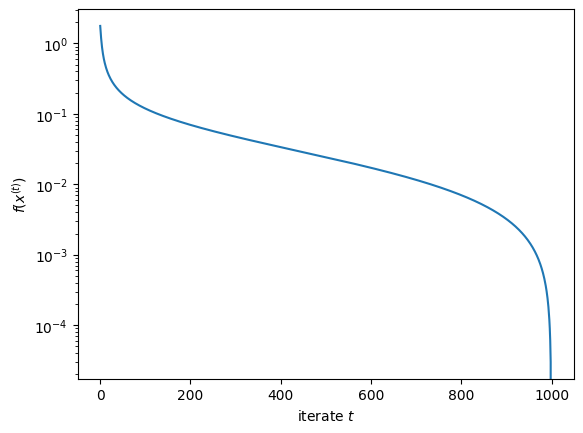

In [31]:
reg = 0.001
n_iter=10000
# BEGIN STUDENT CODE
def softmax_grad_train(W): #depends only on W
    return softmax_grad(W,X_train,y_train,reg)

def softmax_loss_train(W):
    return softmax_loss(W,X_train,y_train,reg)

res=gradient_descent(
softmax_grad_train, lambda x,t: 0.01, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.semilogy(res['callbacks'][:int(0.9*n_iter)]-res['callbacks'][-1])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

**Q7**. Display the training and test accuracies. Comment.

In [32]:
# BEGIN STUDENT CODE
W_star=res['res']
y_train_pred=np.argmax(X_train@W_star,axis=1)
train_accuracy=np.mean(y_train==y_train_pred)
print(f"Training set accuracy:{ train_accuracy}")
      
y_test_pred=np.argmax(X_test@W_star,axis=1)
test_accuracy=np.mean(y_test==y_test_pred)
print(f"Testing set accuracy:{ test_accuracy}")      
# END STUDENT CODE

#As I did another plot with 10000 iterations, the accuracies have changed a litle, but the conclusion is the same

Training set accuracy:0.9909533750869868
Testing set accuracy:0.8583333333333333


## <font color="green">Answer :</font>


The training accuracy is very high, indicating that the model is able to learn and fit the training data very well. However, the testing set accuracy is slightly less than the training set accuracy, which suggests that the model may be overfitting to the training set (slightly). However, a testing set accuracy of 0.85 indicates that the model is still performing very well on unseen data.

## <font color="RED">Conclusion :</font>

In this project, we have seen the principle of **Convex, Non Convex, Gradient Descent, Loss, Softmax function** and many others. It was a very good way to better understand the maths behind the Machine Learning functions we use every day so we can manage to optimize our models and work with a better understanding of our tools. Personnaly, it helped me a lot to understand the new concepts of this year and I will be more capable to solve some exercises that I had trouble with.



### Sources :
1. Explanations, code : Samuel Vaiter's Class Optimisation for Data Science : 
3. Convex, non convex functions :
    1.  https://math.stackexchange.com/questions/3325382/how-to-check-if-a-function-is-convex
    2. https://www.solver.com/convex-optimization#:~:text=Convex%20Functions,-Geometrically%2C%20a%20function&text=A%20function%20is%20concave%20if,is%20neither%20convex%20nor%20concave.
    3. https://www.math.cmu.edu/~lohp/docs/math/mop2013/convexity-soln.pdf

4. Hessian matrix :
    1. https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian
4. Gradient Descent : 
    1. https://www.analyticsvidhya.com/blog/2021/03/understanding-gradient-descent-algorithm/#:~:text=Gradient%20descent%20is%20a%20first,x%20is%20the%20input%20value.
    2. **Maybe not accessible, It is a UDEMY course that I am taking in addition to catching up on my lack of statistics skills :** https://www.udemy.com/course/deeplearning_x/learn/lecture/27842096#notes 
5. Softmax function :
    1. https://deepai.org/machine-learning-glossary-and-terms/softmax-layer
    
    




In [33]:
print("All the cells were executed correctly")

All the cells were executed correctly
